In [8]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.feature import hog
import random

In [5]:
img = cv2.imread('./data/images/train/german shepherd/1.jpg', cv2.IMREAD_GRAYSCALE)

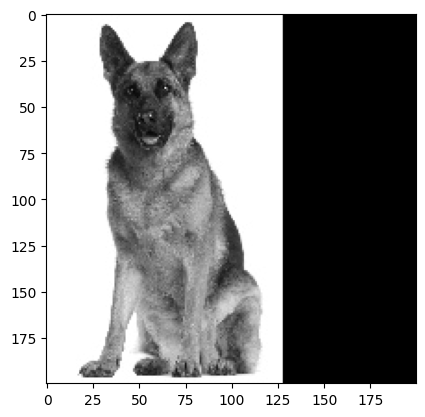

In [6]:
plt.imshow(img, cmap='gray')

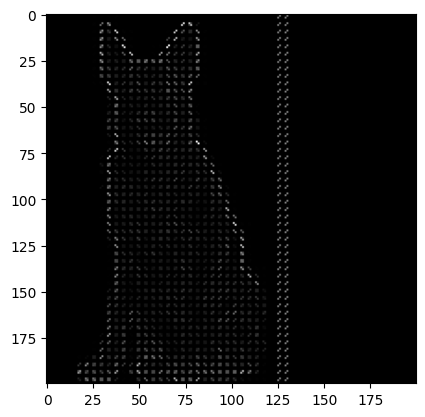

In [7]:
fd, hog_img = hog(img, orientations=18, pixels_per_cell=(4, 4),
               cells_per_block=(2, 2), visualize=True)
plt.imshow(hog_img, cmap='gray')

In [14]:
def create_dataset(usage):

    breeds_dict = {}
    X = []
    y = []

    PATH = f'./data/images/{usage}'
    breed_idx = 0

    for breed in os.listdir(PATH):
        print(f'Processing breed: {breed}... ', end='')
        breeds_dict[breed] = breed_idx
        breed_idx += 1
        breed_path = os.path.join(PATH, breed)
        for image in os.listdir(breed_path):
            image_path = os.path.join(breed_path, image)
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            _, hog_img = hog(img, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True)
            stacked_img = np.stack((img, hog_img), axis=0)
            X.append(stacked_img)
            y.append(breed_idx)
        print('Done!')

    X = np.array(X)
    y = np.array(y)

    return breeds_dict, X, y